In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import seaborn as sns
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [5]:
dataset = pd.read_csv("TSLA.csv")

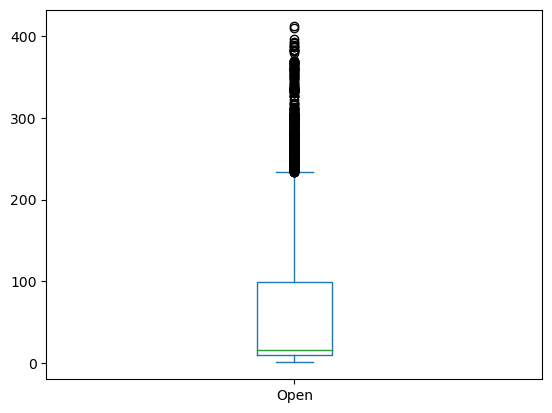

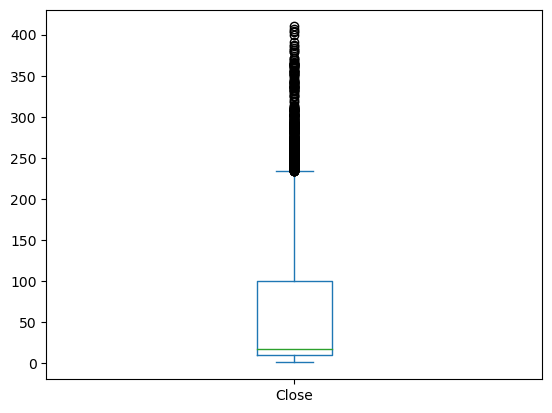

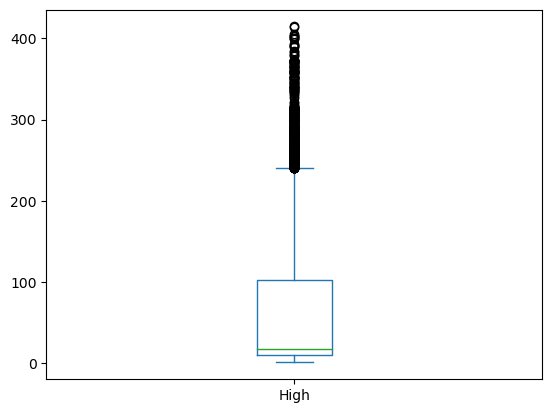

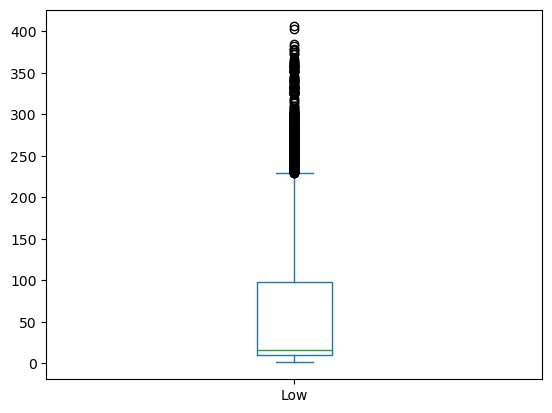

In [6]:
dataset["Open"].plot(kind="box")
plt.show()
dataset["Close"].plot(kind="box")
plt.show()
dataset["High"].plot(kind="box")
plt.show()
dataset["Low"].plot(kind="box")
plt.show()

/var/folders/fq/xdh1hlqx7b9_ffwyvg4g3rwc0000gn/T/ipykernel_2289/2594938447.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = dataset.corr()


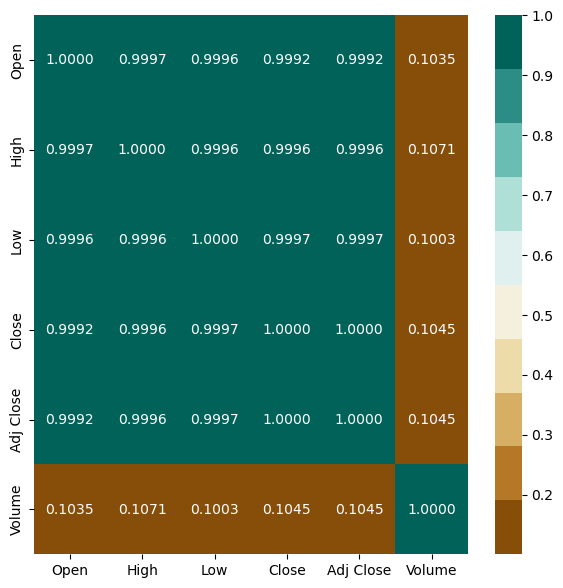

In [7]:
correlations = dataset.corr()
fig, ax = plt.subplots(figsize=(7,7))
colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".4f")

plt.show()

In [8]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000,3.383000e+03
mean,69.595920,71.139907,67.934383,69.578123,69.578123,9.672717e+07
std,101.016818,103.287828,98.520375,100.941653,100.941653,8.022900e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,10.422334,10.824666,10.210000,10.544000,10.544000,4.574925e+07
50%,16.866667,17.132668,16.625999,16.879333,16.879333,8.098950e+07
75%,99.818333,102.410663,97.599998,99.872333,99.872333,1.234176e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3383 entries, 0 to 3382
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3383 non-null   object 
 1   Open       3383 non-null   float64
 2   High       3383 non-null   float64
 3   Low        3383 non-null   float64
 4   Close      3383 non-null   float64
 5   Adj Close  3383 non-null   float64
 6   Volume     3383 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 185.1+ KB


In [10]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [11]:
#scale values to range 0-1
trainset = dataset.iloc[:, 3:4].values
scaler = MinMaxScaler(feature_range = (0,1))
data_scaled = scaler.fit_transform(trainset)
data_scaled

array([[4.21743268e-04],
       [1.37066933e-03],
       [8.71494681e-04],
       ...,
       [5.70594495e-01],
       [5.74029408e-01],
       [5.75042594e-01]])

In [12]:
x_train = []
y_train = []
window = 70

for i in range(window, 2900):
    x_train.append(data_scaled[i-window:i, 0])
    y_train.append(data_scaled[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_test = []
y_test = []
for i in range(2901, 3382):
    x_test.append(data_scaled[i-window:i, 0])
    y_test.append(data_scaled[i,0])
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [14]:
#build LSTM neural network model
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [15]:
#train model
regressor.fit(x_train, y_train,epochs = 10, batch_size = 32)

Epoch 1/10
89/89 [==============================] - 5s 39ms/step - loss: 0.0035
Epoch 2/10
89/89 [==============================] - 4s 41ms/step - loss: 0.0014
Epoch 3/10
89/89 [==============================] - 4s 41ms/step - loss: 0.0014
Epoch 4/10
89/89 [==============================] - 4s 42ms/step - loss: 0.0011
Epoch 5/10
89/89 [==============================] - 4s 41ms/step - loss: 0.0014
Epoch 6/10
89/89 [==============================] - 4s 41ms/step - loss: 0.0010
Epoch 7/10
89/89 [==============================] - 4s 41ms/step - loss: 9.2276e-04
Epoch 8/10
89/89 [==============================] - 4s 40ms/step - loss: 0.0012
Epoch 9/10
89/89 [==============================] - 4s 40ms/step - loss: 9.9107e-04
Epoch 10/10
89/89 [==============================] - 4s 41ms/step - loss: 9.2042e-04


In [16]:
predicted_price = regressor.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)
predicted_price


16/16 [==============================] - 1s 10ms/step


array([[331.76413 ],
       [336.90073 ],
       [341.45068 ],
       [344.95053 ],
       [347.07324 ],
       [347.99088 ],
       [348.12952 ],
       [347.70062 ],
       [346.82858 ],
       [345.63815 ],
       [344.16638 ],
       [342.46713 ],
       [340.4076  ],
       [337.5952  ],
       [334.05368 ],
       [329.97623 ],
       [325.33383 ],
       [320.05627 ],
       [314.47787 ],
       [309.13724 ],
       [304.4147  ],
       [300.50613 ],
       [297.47684 ],
       [295.379   ],
       [294.14603 ],
       [293.7469  ],
       [293.9969  ],
       [294.50577 ],
       [294.96524 ],
       [295.34286 ],
       [295.7009  ],
       [295.99606 ],
       [296.04715 ],
       [295.59418 ],
       [294.35205 ],
       [291.99332 ],
       [288.7469  ],
       [285.09735 ],
       [281.65286 ],
       [278.82822 ],
       [276.79477 ],
       [275.53525 ],
       [274.85742 ],
       [274.46545 ],
       [274.31564 ],
       [274.3161  ],
       [274.3294  ],
       [274.1

In [17]:
#get real price for comparison
real_price =  scaler.inverse_transform(y_test.reshape(-1, 1))
real_price


array([[360.33667 ],
       [340.166656],
       [336.666656],
       [326.666656],
       [346.273346],
       [357.529999],
       [342.179993],
       [337.793335],
       [338.686676],
       [331.666656],
       [331.333344],
       [313.5     ],
       [283.823334],
       [301.070007],
       [302.      ],
       [276.333344],
       [264.003326],
       [287.350006],
       [301.666656],
       [296.470001],
       [293.506653],
       [293.723328],
       [300.90332 ],
       [298.266663],
       [306.666656],
       [298.899994],
       [283.566681],
       [284.383331],
       [297.793335],
       [300.40332 ],
       [291.366669],
       [279.203339],
       [267.033325],
       [253.520004],
       [233.333328],
       [260.799988],
       [271.570007],
       [284.593323],
       [281.42334 ],
       [277.533325],
       [275.053345],
       [268.190002],
       [260.723328],
       [277.33667 ],
       [270.119995],
       [264.589996],
       [252.013336],
       [252.1

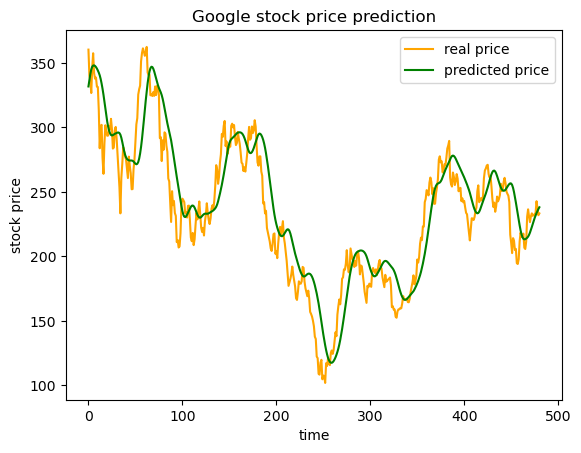

In [18]:
plt.plot(real_price, color = 'orange', label = 'real price')
plt.plot(predicted_price, color = 'green', label = 'predicted price')
plt.title('Google stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()
